In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np
import nltk

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.drop("location", axis=1, inplace=True)
df_test.drop("location", axis=1, inplace=True)

In [4]:
stemmer = nltk.SnowballStemmer(language='english')

In [5]:
df_train["radicais"] = df_train.keyword.apply(lambda x: stemmer.stem(str(x)))

In [6]:
print("A quantidade de keywords total é {}".format(df_train.keyword.value_counts().shape[0]))
print("A quantidade de radicais total utilizando o stemmer é {}".format(df_train.radicais.value_counts().shape[0]))

A quantidade de keywords total é 221
A quantidade de radicais total utilizando o stemmer é 167


In [7]:
# Substituindo radicais NaN
for id_row, row in df_train[df_train.keyword.isna()].iterrows():
    for keyword in df_train.radicais.value_counts().keys():
        if keyword in row.text.lower():
            df_train.loc[id_row, "radicais"] = keyword
            break

In [8]:
#Substituindo keywords com mesmo radical
replace_dict = {}
i = 0
for value in df_train.radicais.value_counts().keys():
    for value2 in df_train.radicais.value_counts().keys():
        if value in value2:
            if value != value2:
                i +=1
                if value2 not in replace_dict.keys():
                    replace_dict[value2] = value


In [9]:
df_train.radicais = df_train.radicais.replace(replace_dict)

In [10]:
print("A quantidade de radicais total depois de substituir palavras repetidas é {}".format(df_train.radicais.value_counts().shape[0]))

A quantidade de radicais total depois de substituir palavras repetidas é 135


In [11]:
targets_per_word = pd.DataFrame(columns = [0,1])

In [12]:
for value in df_train.radicais.value_counts(dropna=False).keys():
    if pd.isna(value):
        target = df_train[df_train.radicais.isna()].target.value_counts(dropna=False)
        df_target = pd.DataFrame(dict(target), index = ["Não especificado"])
    else:
        target = df_train[df_train.radicais == value].target.value_counts()
        df_target = pd.DataFrame(dict(target), index = [value])
    targets_per_word = targets_per_word.append(df_target)

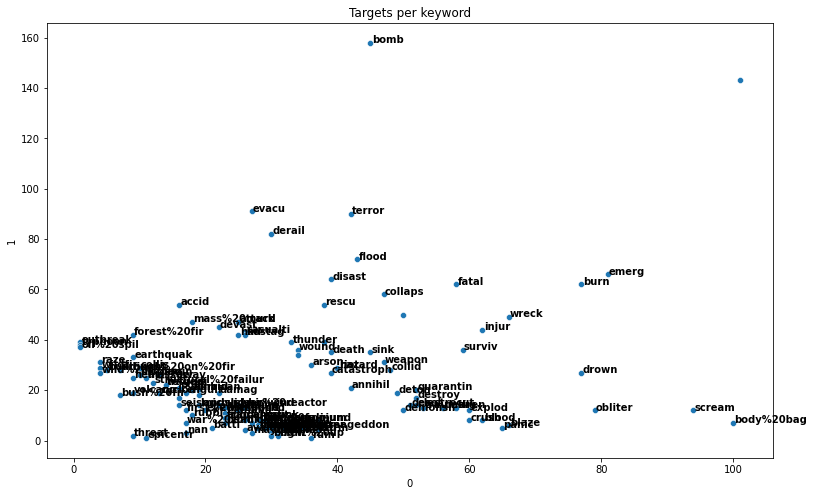

In [13]:
targets_per_word = targets_per_word.rename(columns = {0:"0", 1:"1"})
plt.figure(figsize=(13,8))
sns.scatterplot(data=targets_per_word,x="0",y="1")
plt.title("Targets per keyword") #title
plt.xlabel("0") #x label
plt.ylabel("1") #y label
for line in range(1,targets_per_word.shape[0]):
    if statistics.stdev([targets_per_word["0"][line], targets_per_word["1"][line]]) >1:
        plt.text(targets_per_word["0"][line]+0.2, targets_per_word["1"][line], targets_per_word.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()